# Week 8 - Text Analysis Using NLTK & KoNLPy

# NLTK를 이용한 영문 분석

* NLTK를 사용하기 위해서는 터미널에서 **```pip install nltk```** 를 수행한다.
* NLTK는 다수의 샘플데이터와 tagger를 위한 모듈이 포함되어 있다.
* 해당 모듈을 다운로드 하기 위해서는 **```nltk.download()```** 를 수행한다.

In [6]:
!pip3 list

Package               Version
--------------------- -------
appnope               0.1.0  
attrs                 19.1.0 
backcall              0.1.0  
bleach                3.1.0  
Click                 7.0    
decorator             4.4.0  
defusedxml            0.6.0  
Django                2.2.3  
django-appconf        1.0.3  
django-imagekit       4.0.2  
django-mathfilters    0.4.0  
django-taggit         1.1.0  
entrypoints           0.3    
ipykernel             5.1.2  
ipython               7.8.0  
ipython-genutils      0.2.0  
ipywidgets            7.5.1  
jedi                  0.15.1 
Jinja2                2.10.1 
JPype1                0.7.0  
JPype1-py3            0.5.5.4
jsonschema            3.0.2  
jupyter               1.0.0  
jupyter-client        5.3.1  
jupyter-console       6.0.0  
jupyter-core          4.5.0  
konlpy                0.5.1  
MarkupSafe            1.1.1  
mistune               0.8.4  
nbconvert             5.6.0  
nbformat              4.4.0  
nicky     

In [1]:
# 다시 실행시키지 마세요!
import nltk
# 특정 모듈을 다운로드 하기 위해서는 다음과 같이 해당 모듈의 이름을 패러미터로 제공한다.
nltk.download('gutenberg') # text가 컴퓨터에 저장됨. gutenberg 텍스트는, 옛날 디지털 도서관 프로젝트. loyalty 없이 사용하는 분석 샘플
nltk.download('maxent_treebank_pos_tagger') # stemmer 다운로드

[nltk_data] Downloading package gutenberg to /Users/user/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/user/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.


True

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/user/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## 1. Reading Sample Data

In [2]:
from nltk.corpus import gutenberg
gutenberg_files = gutenberg.fileids() # 어떤 파일들이 있는지?
gutenberg_files

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
gutenberg_doc = gutenberg.open('austen-emma.txt').read()
gutenberg_doc

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister\'s marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse\'s family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice o

## 2. Tokenize the Text

### Example from http://www.nltk.org

In [11]:
# sample tokenization
sentence = """At eight o'clock on Thursday morning
... Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 '...',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [14]:
tagged = nltk.pos_tag(tokens) # 만들어진 token을 하나하나 불러서 pos_tagging해줌 => tuple로 반환
tagged

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN'),
 ('...', ':'),
 ('Arthur', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('feel', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('.', '.')]

### Alphabetical list of part-of-speech tags used in the Penn Treebank Project:
https://www.cis.upenn.edu/~treebank/

```
CC Coordinating conjunction
CD Cardinal number
DT Determiner
EX Existential there
FW Foreign word
IN Preposition or subordinating conjunction
JJ Adjective
JJR Adjective, comparative
JJS Adjective, superlative
LS List item marker
MD Modal
NN Noun, singular or mass
NNS Noun, plural
NNP Proper noun, singular
NNPS Proper noun, plural
PDT Predeterminer
POS Possessive ending
PRP Personal pronoun
PRP$ Possessive pronoun
RB Adverb
RBR Adverb, comparative
RBS Adverb, superlative
RP Particle
SYM Symbol
TO to
UH Interjection
VB Verb, base form
VBD Verb, past tense
VBG Verb, gerund or present participle
VBN Verb, past participle
VBP Verb, non­3rd person singular present
VBZ Verb, 3rd person singular present
WDT Wh­determiner
WP Wh­pronoun
WP$ Possessive wh­pronoun
WRB Wh­adverb
```

In [15]:
gutenberg_tokens = nltk.word_tokenize(gutenberg_doc) # token을 만든 후
gutenberg_tagged = nltk.pos_tag(gutenberg_tokens) # token으로 pos_tag

In [16]:
gutenberg_tokens

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistin

In [17]:
gutenberg_tagged

[('[', 'NNS'),
 ('Emma', 'NNP'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 (']', 'NNP'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN'),
 (';', ':'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty-one', 'CD'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP'),
 ('.', '.')

## 3. Stemming (or lemmatizing) the Words

단어의 어근을 추출하기 위해 stemming 작업을 한다.
* NLTK는 stemming과 lemmatizing을 제공하는데, stemming보다는 lemmatazing이 보다 원하는 결과를 얻을 수 있다.
https://en.wikipedia.org/wiki/Lemmatisation#Description

**Lemmatisation** is closely related to **stemming**. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

For instance:

1. The word "better" has "good" as its lemma. This link is missed by stemming, as it requires a dictionary look-up.
2. The word "walk" is the base form for word "walking", and hence this is matched in both stemming and lemmatisation.
3. The word "meeting" can be either the base form of a noun or a form of a verb ("to meet") depending on the context, e.g., "in our last meeting" or "We are meeting again tomorrow". Unlike stemming, lemmatisation can in principle select the appropriate lemma depending on the context.

### Lemmatization

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [20]:
lemma = nltk.wordnet.WordNetLemmatizer()
gutenberg_lemma = [] # 단어들을 담을 list
for token in gutenberg_tokens:
    gutenberg_lemma.append(lemma.lemmatize(token))

gutenberg_lemma

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessing',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'year',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'wa',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughter',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',

In [21]:
gutenberg_lemma_tagged = nltk.pos_tag(gutenberg_lemma)
gutenberg_lemma_tagged

[('[', 'NNS'),
 ('Emma', 'NNP'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 (']', 'NNP'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessing', 'NN'),
 ('of', 'IN'),
 ('existence', 'NN'),
 (';', ':'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty-one', 'JJ'),
 ('year', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP'),
 ('.', '.'),
 (

### Stemming

In [22]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
gutenberg_stemmed = []
for token in gutenberg_tokens:
    gutenberg_stemmed.append(porter_stemmer.stem(token))

gutenberg_stemmed

['[',
 'emma',
 'by',
 'jane',
 'austen',
 '1816',
 ']',
 'volum',
 'I',
 'chapter',
 'I',
 'emma',
 'woodhous',
 ',',
 'handsom',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfort',
 'home',
 'and',
 'happi',
 'disposit',
 ',',
 'seem',
 'to',
 'unit',
 'some',
 'of',
 'the',
 'best',
 'bless',
 'of',
 'exist',
 ';',
 'and',
 'had',
 'live',
 'nearli',
 'twenty-on',
 'year',
 'in',
 'the',
 'world',
 'with',
 'veri',
 'littl',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'she',
 'wa',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughter',
 'of',
 'a',
 'most',
 'affection',
 ',',
 'indulg',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequ',
 'of',
 'her',
 'sister',
 "'s",
 'marriag',
 ',',
 'been',
 'mistress',
 'of',
 'hi',
 'hous',
 'from',
 'a',
 'veri',
 'earli',
 'period',
 '.',
 'her',
 'mother',
 'had',
 'die',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembr',
 'of',
 'her',
 'caress'

In [ ]:
gutenberg_stemmed_tagged = nltk.pos_tag(gutenberg_stemmed) # 단어의 기본형(어근)을 찾아줌
gutenberg_stemmed_tagged

### Compare Stemming and Lemmatization

http://stackoverflow.com/questions/17317418/stemmers-vs-lemmatizers

In [23]:
porter_stemmer.stem('running')

'run'

In [24]:
lemma.lemmatize('running')

'running'

## 실습 1

* 단어별로 카운트를 하여 가장 많이 사용된 순서로 정렬하자.
* (참고) https://docs.python.org/3/library/collections.html#collections.Counter.most_common

In [26]:
from collections import Counter

gutenberg_lemma_counted = Counter(gutenberg_lemma)
gutenberg_lemma_counted.most_common()
# dict을 만들어 줌. 단어가 출현한 순서 -> most.common = 단어의 빈도수

[(',', 12016),
 ('.', 6355),
 ('to', 5125),
 ('the', 4844),
 ('and', 4653),
 ('a', 4388),
 ('of', 4272),
 ('I', 3177),
 ('--', 3100),
 ("''", 2452),
 ('wa', 2383),
 ('her', 2360),
 (';', 2353),
 ('not', 2242),
 ('it', 2221),
 ('in', 2103),
 ('be', 1965),
 ('she', 1774),
 ('``', 1735),
 ('that', 1729),
 ('you', 1664),
 ('had', 1605),
 ('he', 1365),
 ('for', 1320),
 ('have', 1301),
 ('is', 1221),
 ('with', 1185),
 ('very', 1151),
 ('but', 1148),
 ('Mr.', 1091),
 ('his', 1084),
 ('!', 1063),
 ('at', 996),
 ('so', 918),
 ("'s", 866),
 ('Emma', 855),
 ('all', 831),
 ('could', 824),
 ('would', 813),
 ('been', 755),
 ('him', 748),
 ('on', 674),
 ('Mrs.', 668),
 ('any', 651),
 ('?', 621),
 ('my', 619),
 ('no', 616),
 ('Miss', 592),
 ('were', 590),
 ('do', 583),
 ('must', 563),
 ('She', 562),
 ('by', 556),
 ('me', 554),
 ('which', 552),
 ('will', 545),
 ('from', 535),
 ('Harriet', 496),
 ('or', 490),
 ('said', 483),
 ('much', 476),
 ('more', 463),
 ('thing', 454),
 ('an', 451),
 ('are', 447),
 

## 4. Removing Stopwords

In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) # stopwords 단어들 중 english 지정, 미리 만들어진 단어들
stop_words

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [29]:
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])
# stop_words는 set이기 때문에, 추가할 수 있음
filtered_words = [word for word in gutenberg_lemma if word not in stop_words]
filtered_words # i와 I는 다르게 처리된다. 맨 앞에서 .lower() 를 사용하여 모두 소문자로 변환시키면 문제를 해결할 수 있다.
# filtered_words = [word.lower() for word in gutenberg_lemma if word not in stop_words] -> 대/소문자 동일 취급

['Emma',
 'Jane',
 'Austen',
 '1816',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 'handsome',
 'clever',
 'rich',
 'comfortable',
 'home',
 'happy',
 'disposition',
 'seemed',
 'unite',
 'best',
 'blessing',
 'existence',
 'lived',
 'nearly',
 'twenty-one',
 'year',
 'world',
 'little',
 'distress',
 'vex',
 'She',
 'wa',
 'youngest',
 'two',
 'daughter',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 "'s",
 'marriage',
 'mistress',
 'house',
 'early',
 'period',
 'Her',
 'mother',
 'died',
 'long',
 'ago',
 'indistinct',
 'remembrance',
 'caress',
 'place',
 'supplied',
 'excellent',
 'woman',
 'governess',
 'fallen',
 'little',
 'short',
 'mother',
 'affection',
 'Sixteen',
 'year',
 'Miss',
 'Taylor',
 'Mr.',
 'Woodhouse',
 "'s",
 'family',
 'le',
 'governess',
 'friend',
 'fond',
 'daughter',
 'particularly',
 'Emma',
 'Between',
 '_them_',
 'wa',
 'intimacy',
 'sister',
 'Even',
 'Miss',
 'Taylor',
 'ceased',
 'hold',
 'nominal',
 'office',
 '

## 실습 2
* 명사의 유니크리스트를 만들어 보자.

In [37]:
# tagging -> NN, NNS, NNP, NNPS 등을 이용하여 명사 listing

filtered_words_tagged = nltk.pos_tag(filtered_words) 
filtered_words_tagged

gutenberg_lemma_nouns = set()
for word, tagger in filtered_words_tagged:
    # print(word, tagger)
    if tagger in ['NN', 'NNP', 'NNS', 'NNPS']:
        # print(word, tagger)
        gutenberg_lemma_nouns.add(word)

gutenberg_lemma_nouns

# noun = [(word, tag) for tag in filtered_words_tagged if tag in ['NN', 'NNP', 'NNS', 'NNPS']]
# noun
# list(noun)

{'husband',
 '_gentleman_',
 'country-dance',
 'foot-pace',
 'briefly',
 'prof',
 'weakness',
 'remainder',
 'candidate',
 'privy',
 'curious',
 'Aunt',
 'Ambition',
 'defend',
 'popularity.',
 'rooms.',
 'post',
 'basis',
 'conjecture',
 'remote',
 'carriage-horses',
 'art',
 'thereabouts',
 'verdure',
 'name',
 'mistaken',
 '_one_',
 'darker',
 'twelvemonth',
 'virtue',
 'Put',
 'remembering',
 'humble',
 'perturbation',
 'Every',
 'self-approbation',
 'apartment',
 'living',
 'hid',
 'Gilbert',
 'idlest',
 'sash',
 '_shall_',
 'engrosses',
 'sister-in-law',
 'match-making',
 'morality',
 'Picture',
 'lawn',
 'Miniatures',
 'restrain',
 'undone',
 'convenient',
 'self-command',
 'caviller',
 'self',
 'Kindled',
 'throw',
 'trophy',
 'intercourse',
 'look-out',
 'refuse.',
 'Knightleys',
 'Ungrateful',
 'plainer',
 'II',
 'hearing',
 'Cox',
 '_precious_',
 'deserve.',
 'amendment',
 'cockade',
 'Church',
 '_world_',
 'motive',
 'school',
 'society.',
 'interval',
 'heroine',
 'errand'

# KoNLPy 를 이용한 한글 분석

* KoNLPy를 이용하여 한글 형태소 분석을 한다.
* KoNLPy는 다음과 같은 형태소 분석기를 파이썬에서 사용할 수 있게 한다.
    * 한나눔(카이스트, 1999)
    * 꼬꼬마(서울대, 2004)
    * 코모란(Shineware, 2014)
    * 은전한닢 프로젝트 
    * Twitter Korean Text
* 다음의 주소를 참고하여 KoNLPy를 설치하자.
    * http://konlpy.org/en/v0.4.4/

### KoNLPy의 기초 (from the website)

In [1]:
from konlpy.tag import Kkma  # 꼬꼬마 형태소 분석기 사용

kkma = Kkma() # 형태소 분석기 개체 
text = "오늘 서울의 날씨는 추워질 전망입니다. 오후 한때 소나기가 올 예정입니다."
sentences = kkma.sentences(text)
sentences[1]
# deprecated warning: 앞으로는 함수가 사라질 것이다. (지금은 무시)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


'오후 한때 소나기가 올 예정입니다.'

In [2]:
from konlpy.tag import Komoran

tagger = Komoran()
tags = tagger.pos(text)
tags

[('오늘', 'NNG'),
 ('서울', 'NNP'),
 ('의', 'JKG'),
 ('날씨', 'NNG'),
 ('는', 'JX'),
 ('춥', 'VA'),
 ('어', 'EC'),
 ('지', 'VX'),
 ('ㄹ', 'ETM'),
 ('전망', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EF'),
 ('.', 'SF'),
 ('오후', 'NNG'),
 ('한때', 'NNG'),
 ('소나기', 'NNP'),
 ('가', 'JKS'),
 ('올', 'MM'),
 ('예정', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EF'),
 ('.', 'SF')]

In [3]:
kkma.nouns(text) # 내장 함수 nouns

['오늘', '서울', '날씨', '전망', '오후', '한때', '소나기', '예정']

In [4]:
kkma.pos(text) # tagging

[('오늘', 'NNG'),
 ('서울', 'NNG'),
 ('의', 'JKG'),
 ('날씨', 'NNG'),
 ('는', 'JX'),
 ('춥', 'VA'),
 ('어', 'ECS'),
 ('지', 'VXV'),
 ('ㄹ', 'ETD'),
 ('전망', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('오후', 'NNG'),
 ('한때', 'NNG'),
 ('소나기', 'NNG'),
 ('가', 'JKS'),
 ('오', 'VV'),
 ('ㄹ', 'ETD'),
 ('예정', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF')]

In [5]:
# sample text를 사용하여 분석
from konlpy.corpus import kolaw 
fids = kolaw.fileids() 
fids

['constitution.txt']

In [6]:
ko_data = kolaw.open('constitution.txt').read()
ko_data

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

## 1. Reading Data & Clean Up

### 파일 불러오기
* data/moon-memorial-day.txt 데이터 로드

In [7]:
with open('data/moon-memorial-day.txt', 'r') as f:
    lines = f.read().splitlines() # 한 줄씩 띄워주기
lines

['존경하는 국민 여러분,',
 '',
 '국가유공자와 유가족 여러분,',
 '',
 '',
 '',
 '얼마나 많은 그리움을 안고 이곳에 오셨습니까.',
 '',
 '보고 싶은 사람을 가슴 깊숙이 품고 계신 분들을',
 '',
 '여기 오는 길 곳곳에서 마주쳤습니다.',
 '',
 '',
 '',
 '저는 오늘 예순 세 번째 현충일을 맞아,',
 '',
 '우리를 지키고 나라를 위해 희생한 영령들이',
 '',
 '모두 우리의 이웃이었고 가족이었다는 사실을 ',
 '',
 '새삼 깨닫습니다.',
 '',
 '',
 '',
 '국민과 국가를 위해 헌신한 국가유공자 여러분께 ',
 '',
 '깊은 존경의 마음을 표하며,',
 '',
 '유가족께 애틋한 애도의 말씀을 드립니다.',
 '',
 '',
 '',
 '존경하는 국민 여러분,',
 '',
 '',
 '',
 '대한민국의 역사는 우리의 이웃과 가족들이',
 '',
 '평범한 하루를 살며 만들어온 역사입니다.',
 '',
 '',
 '',
 '아침마다 대문 앞에서',
 '',
 '밝은 얼굴로 손 흔들며 출근한 우리의 딸, 아들들이',
 '',
 '자신의 책임을 다하며 일궈온 역사입니다.',
 '',
 '',
 '',
 '일제 치하, 앞장서 독립만세를 외친 것도,',
 '',
 '나라를 지키기 위해 전쟁터에 나간 것도,',
 '',
 '누구보다 성실히 일하며 경제발전에 이바지한 것도,',
 '',
 '민주주의가 위기에 처했을 때 두 주먹 불끈 쥐고',
 '',
 '거리에 나선 것도,',
 '',
 '모두 평범한 우리의 이웃, 보통의 국민들이었습니다.',
 '',
 '',
 '',
 '그 과정에서 희생한 대부분의 사람들도',
 '',
 '우리의 이웃들이었습니다.',
 '',
 '이곳, 대전현충원은 바로 그 분들을 모신 곳입니다.',
 '',
 '',
 '',
 '독립유공자와 참전용사가 이곳에 계십니다.',
 '',
 '독도의용수비대, 연평해전과 연평도 포격 전사자, ',
 '',
 '천안함의 호국영령을 모셨습니다

### 빈 문장 정리

In [8]:
sentences = [line for line in lines if line != ''] # line이 빈 문장이 아니면
sentences

['존경하는 국민 여러분,',
 '국가유공자와 유가족 여러분,',
 '얼마나 많은 그리움을 안고 이곳에 오셨습니까.',
 '보고 싶은 사람을 가슴 깊숙이 품고 계신 분들을',
 '여기 오는 길 곳곳에서 마주쳤습니다.',
 '저는 오늘 예순 세 번째 현충일을 맞아,',
 '우리를 지키고 나라를 위해 희생한 영령들이',
 '모두 우리의 이웃이었고 가족이었다는 사실을 ',
 '새삼 깨닫습니다.',
 '국민과 국가를 위해 헌신한 국가유공자 여러분께 ',
 '깊은 존경의 마음을 표하며,',
 '유가족께 애틋한 애도의 말씀을 드립니다.',
 '존경하는 국민 여러분,',
 '대한민국의 역사는 우리의 이웃과 가족들이',
 '평범한 하루를 살며 만들어온 역사입니다.',
 '아침마다 대문 앞에서',
 '밝은 얼굴로 손 흔들며 출근한 우리의 딸, 아들들이',
 '자신의 책임을 다하며 일궈온 역사입니다.',
 '일제 치하, 앞장서 독립만세를 외친 것도,',
 '나라를 지키기 위해 전쟁터에 나간 것도,',
 '누구보다 성실히 일하며 경제발전에 이바지한 것도,',
 '민주주의가 위기에 처했을 때 두 주먹 불끈 쥐고',
 '거리에 나선 것도,',
 '모두 평범한 우리의 이웃, 보통의 국민들이었습니다.',
 '그 과정에서 희생한 대부분의 사람들도',
 '우리의 이웃들이었습니다.',
 '이곳, 대전현충원은 바로 그 분들을 모신 곳입니다.',
 '독립유공자와 참전용사가 이곳에 계십니다.',
 '독도의용수비대, 연평해전과 연평도 포격 전사자, ',
 '천안함의 호국영령을 모셨습니다.',
 '소방공무원과 경찰관, 순직공무원 묘역이 조성되었고,',
 '‘의사상자묘역’도 따로 만들어 ',
 '숭고한 뜻을 기리고 있습니다.',
 '2006년, 카센터 사장을 꿈꾸던 채종민 정비사는',
 '9살 아이를 구한 뒤 바다에서 숨을 거뒀습니다.',
 '2009년, 김제시 농업기술센터 황지영 행정인턴과 ',
 '어린이집 금나래 교사는',
 '교통사고를 당한 사람을 돕다가 ',
 '뒤따르던 차량에 목숨을 잃었습니다

## 2. 형태소 분석

### 형태소 분석 테스트

첫번째 문장을 가져와 코모란 형태소 분석기로 분석해보자.

In [17]:
sent = sentences[0] # 첫 번째 sentence만 꺼내 sent에 저장
sent

'존경하는 국민 여러분,'

In [18]:
from konlpy.tag import Komoran
tagger = Komoran()
tags = tagger.pos(sent)
tags

[('존경', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('국민', 'NNG'),
 ('여러분', 'NNP'),
 (',', 'SP')]

### 각 문장의 형태소를 분석하자.

In [ ]:
tagged_sentences = [tagger.pos(sent) for sent in sentences]
tagged_sentences
# list 안에 list가 들어있게 됨. list 안의 각각의 list는 하나의 sentence, 그 안에는 각각 word & tag가 들어있음


## 3. 명사의 리스트 만들기

각 문장의 형태소 중 일반명사(NNG)또는 고유명사(NNP)를 수집하고 카운트를 세어 보자.

In [12]:
noun_list = []
for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            noun_list.append(word)
            
noun_list

# list가 또 생긴다는 점. NLTK에서의 tag 방식과 다름! -> for loop를 돌릴 때, inner loop를 한번 더 실행 
# list 안에 문장별로 list를 담아두면, 어디까지가 한 문장인지 알 수 있음

['존경',
 '국민',
 '여러분',
 '국가',
 '유공자',
 '유가족',
 '여러분',
 '그리움',
 '안고',
 '사람',
 '가슴',
 '길',
 '곳곳',
 '오늘',
 '현충일',
 '나라',
 '희생',
 '영령',
 '이웃',
 '가족',
 '사실',
 '국민',
 '국가',
 '헌신',
 '국가',
 '유공자',
 '존경',
 '마음',
 '유가족',
 '애도',
 '말씀',
 '존경',
 '국민',
 '여러분',
 '대한민국의 역사',
 '이웃',
 '가족',
 '하루',
 '역사',
 '아침',
 '대문',
 '앞',
 '얼굴',
 '손',
 '출근',
 '딸',
 '아들',
 '자신',
 '책임',
 '역사',
 '일제',
 '치하',
 '독립',
 '만세',
 '나라',
 '전쟁터',
 '일',
 '경제',
 '발전',
 '이바지',
 '민주주의',
 '위기',
 '때',
 '주먹',
 '거리',
 '이웃',
 '보통',
 '국민',
 '과정',
 '희생',
 '대부분',
 '사람',
 '이웃',
 '전현',
 '충원',
 '곳',
 '독립',
 '유공',
 '자와',
 '참전',
 '용사',
 '독도의용수비대',
 '연평해전',
 '연평도 포격',
 '전사자',
 '안함',
 '호국',
 '영령',
 '소방',
 '공무원',
 '경찰관',
 '순직',
 '공무원',
 '묘역',
 '조성',
 '의사',
 '상자',
 '묘역',
 '뜻',
 '2006년',
 '카',
 '센터',
 '사장',
 '종',
 '민',
 '정비사',
 '아이',
 '뒤',
 '바다',
 '숨',
 '2009년',
 '김제시',
 '농업기술센터',
 '황',
 '지영',
 '행정',
 '인턴',
 '어린이집',
 '교사',
 '교통사고',
 '사람',
 '차량',
 '목숨',
 '2016년',
 '성우',
 '대학생',
 '안치',
 '범',
 '군',
 '화재',
 '건물',
 '이웃',
 '대피',
 '자신',
 '유가족',
 '영원',
 '그리움',


In [13]:
from collections import Counter
noun_counts = Counter(noun_list)
noun_counts.most_common()

[('국가', 22),
 ('국민', 14),
 ('유공자', 12),
 ('나라', 9),
 ('이웃', 9),
 ('보훈', 9),
 ('존경', 8),
 ('대한민국', 8),
 ('정부', 8),
 ('여러분', 7),
 ('가족', 7),
 ('마음', 6),
 ('사람', 5),
 ('희생', 5),
 ('헌신', 5),
 ('때', 5),
 ('믿음', 5),
 ('유가족', 4),
 ('오늘', 4),
 ('독립', 4),
 ('참전', 4),
 ('삶', 4),
 ('애국', 4),
 ('기억', 4),
 ('임시', 4),
 ('그리움', 3),
 ('영령', 3),
 ('말씀', 3),
 ('자신', 3),
 ('일', 3),
 ('용사', 3),
 ('묘역', 3),
 ('역할', 3),
 ('선생', 3),
 ('유해', 3),
 ('발굴', 3),
 ('소방관', 3),
 ('의인', 3),
 ('가슴', 2),
 ('사실', 2),
 ('하루', 2),
 ('역사', 2),
 ('책임', 2),
 ('곳', 2),
 ('공무원', 2),
 ('순직', 2),
 ('뜻', 2),
 ('센터', 2),
 ('슬픔', 2),
 ('용기', 2),
 ('힘', 2),
 ('이유', 2),
 ('무연', 2),
 ('한국전쟁', 2),
 ('전사', 2),
 ('김', 2),
 ('묘소', 2),
 ('드릴', 2),
 ('끝', 2),
 ('이름', 2),
 ('모두', 2),
 ('후손', 2),
 ('생활', 2),
 ('지원금', 2),
 ('1월', 2),
 ('이동녕', 2),
 ('여사', 2),
 ('전달', 2),
 ('신설', 2),
 ('예우', 2),
 ('속', 2),
 ('품격', 2),
 ('대통령', 2),
 ('조기', 2),
 ('병원', 2),
 ('요양', 2),
 ('예정', 2),
 ('애국자', 2),
 ('안고', 1),
 ('길', 1),
 ('곳곳', 1),
 ('현충일', 1),
 ('애도', 

## 4. Visualization

### Word Cloud 그리기
* pip install wordcloud
* pip install Pillow (PIL)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# python wordcloud documentation 확인

In [21]:
cloud = WordCloud(width=900, height=600, 
                  font_path='data/08서울남산체 B.ttf',
                  background_color='white')

In [22]:
cloud = cloud.fit_words(noun_counts) # 크기에 맞춰서, 큰 글자의 빈 공간에 작은 글자들이 들어갈 수 있게끔 설정. 박스들(font가 없으면 box들만 나옴) 사이 공간을 결정

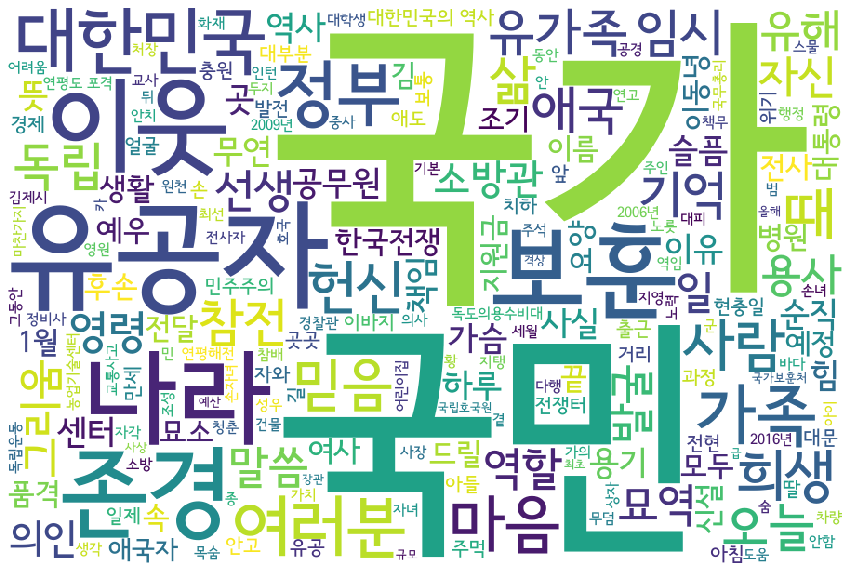

In [23]:
plt.figure(figsize=(15, 20))
plt.axis('off') # x, y축의 scale 숨기기
plt.imshow(cloud)
plt.show()

## 5. 같은 문장에 등장하는 단어의 관계도 그리기

같은 문장에 등장하는 단어는 서로 연관성이 높을 가능성이 있다.
* 예: '돌이켜 보면, 글로벌 경제위기에다 장기 경기 침체로 연속되는 위기에서 벗어나기 위해 매 순간마다 마음을 놓을 수 없었던 순간들이 많았던 것 같습니다.'
* '글로벌' '경제위기' '경기' '침체' '위기' -> 서로 연관성이 있는 단어들.

### 명사의 unique list 만들기

* enumerate() 사용법

```
choices = ['pizza', 'pasta', 'salad', 'nachos']
list(enumerate(choices))
=> [(0, 'pizza'), (1, 'pasta'), (2, 'salad'), (3, 'nachos')]
```

In [20]:
unique_nouns = set()
for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            unique_nouns.add(word)

unique_nouns = list(unique_nouns) # set인 unique_nouns를 list로 convert
noun_index = {noun: i for i, noun in enumerate(unique_nouns)}
noun_index # 명사들의 index가 생기고, dict을 만듦. 

{'정식': 0,
 '2016년': 1,
 '세월': 2,
 '김': 3,
 '그동안': 4,
 '인턴': 5,
 '책무': 6,
 '지영': 7,
 '지방': 8,
 '이유': 9,
 '곳': 10,
 '전사': 11,
 '그리움': 12,
 '자치': 13,
 '속': 14,
 '대부분': 15,
 '곳도': 16,
 '개원': 17,
 '경찰관': 18,
 '생존': 19,
 '정비사': 20,
 '앞': 21,
 '개선': 22,
 '이동녕': 23,
 '사망': 24,
 '김은영': 25,
 '주먹': 26,
 '김제시': 27,
 '주인': 28,
 '공수': 29,
 '기억': 30,
 '성우': 31,
 '만원': 32,
 '포함': 33,
 '당': 34,
 '전북': 35,
 '발굴': 36,
 '눈물': 37,
 '1월': 38,
 '위기': 39,
 '존경': 40,
 '따님': 41,
 '만세': 42,
 '선생': 43,
 '사람': 44,
 '사령부': 45,
 '유공': 46,
 '진심': 47,
 '3월': 48,
 '황': 49,
 '국민': 50,
 '소방관': 51,
 '집': 52,
 '의사': 53,
 '각각': 54,
 '농업기술센터': 55,
 '자부심': 56,
 '손': 57,
 '발전': 58,
 '국립호국원': 59,
 '참배': 60,
 '훈령': 61,
 '여사': 62,
 '연평도 포격': 63,
 '패': 64,
 '기본': 65,
 '행정': 66,
 '처장': 67,
 '애국': 68,
 '애국자': 69,
 '희생': 70,
 '범': 71,
 '정비': 72,
 '역임': 73,
 '임시': 74,
 '활동': 75,
 '최선': 76,
 '참전': 77,
 '여러분': 78,
 '마찬가지': 79,
 '역할': 80,
 '완성': 81,
 '수습': 82,
 '품격': 83,
 '신설': 84,
 '계획': 85,
 '연평해전': 86,
 '한국전쟁': 87,
 '마음속': 88,
 '바다': 

In [21]:
noun_index['한국전쟁'] # 다른 단어들로 test 해보기

87

### 문장-단어 행렬 계산

In [22]:
# 각 단어의 matrix를 만들어서, 단어들끼리(ex. a-d, b-c) 공출현빈도를 계산
import numpy as np
occurs = np.zeros([len(tagged_sentences), len(unique_nouns)]) # 빈 matrix를 만듦
np.shape(occurs) # 각 row: 158개의 문장 / 각 col: 315개의 unique한 단어들

(158, 316)

In [23]:
for i, sent in enumerate(tagged_sentences):
    # print(i, sent)
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            index = noun_index[word]  # 명사가 있으면, 그 명사의 인덱스를 index에 저정
            occurs[i][index] = 1  # 문장 i의 index 자리에 1을 채워 넣는다. (ex. row번째 문장에 col의 단어가 있으면 해당 cell에 +1)
            
occurs[0] # 한 줄만 출력! (noun)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
noun_index['여러분']

78

### 공존 단어 행렬 계산

In [25]:
# 행렬의 곱, 행과 열 뒤집기 -> occurs.T (transpose)
co_occurs = occurs.T.dot(occurs)

In [26]:
co_occurs[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 연관 단어의 network graph 그리기

* pip install networkx

In [27]:
import networkx as nx
graph = nx.Graph()

for i in range(len(unique_nouns)):
    for j in range(i + 1, len(unique_nouns)):
        if co_occurs[i][j] > 2: # 숫자 바꿔가면서 실행, edge가 어떻게 변하는지 확인
            graph.add_edge(unique_nouns[i], unique_nouns[j]) # 두 개의 node를 edge로 연결

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/user/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


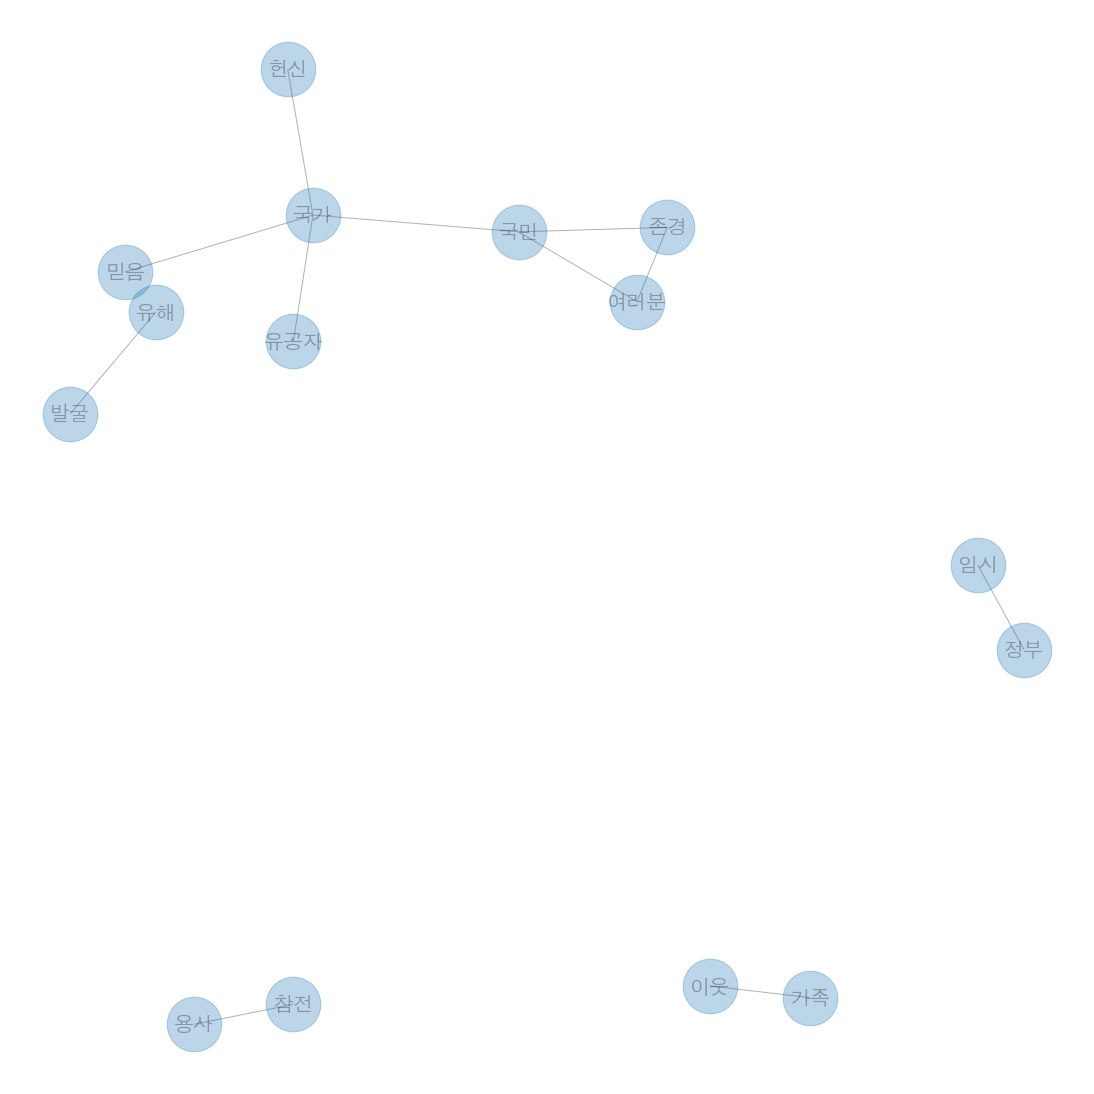

In [29]:
plt.figure(figsize=(15, 15))
layout = nx.spring_layout(graph, k=.5)
nx.draw(graph, pos=layout, with_labels=True,
        font_size=20, font_family="AppleGothic",
        alpha=0.3, node_size=3000)
plt.show()
# word cloud에서는 보지 못한 맥락들 (cf. 남북회담 이후 text processing network)